In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import numpy as np
import pandas as pd



import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [6]:
class PipelineRecommendation():
    def __init__(self):
        self.project = 'churn prediction '
        
    def get_percent_missing(self, df):
        percent_missing = df.isnull().sum() * 100 / len(df)
        missing_value_df = pd.DataFrame({'column_name': df.columns,
                                             'percent_missing': percent_missing})
        missing_value_df.sort_values('percent_missing', inplace=True)
        percent_missing = df.isnull().sum() * 100 / len(df)
        
        print('Percentage of Missing Values: ')

        return percent_missing
    
    
    def unique_counts(self, df):
        """
        Returns the number of unique values and unique values for each feature in the given dataframe.

        Parameters:
        df (pandas.DataFrame): The input dataframe.

        Returns:
        unique_counts_df (pandas.DataFrame): A dataframe containing the feature names, the number of unique values, the unique values, and the data type of each feature.
        """
        unique_counts = df.nunique()
        unique_values = [df[column].unique() for column in df.columns]
        data_types = [str(df[column].dtype) for column in df.columns]
        unique_counts_df = pd.DataFrame({'feature': df.columns, 'unique_count': unique_counts, 'unique_values': unique_values, 'data_type': data_types})
        return unique_counts_df
    
    
    def dataframe_insights(self, df):
        """
        This function provides basic insights about a dataframe.

        Parameters:
        df (pandas dataframe): The dataframe to analyze.

        Returns:
        A dictionary containing basic insights about the dataframe.
        """
        insights = {}
        insights['Number of records'] = len(df)
        insights['Number of columns'] = len(df.columns)
        insights['Columns'] = list(df.columns)
        insights['Number of unique values in each column'] = df.nunique().to_dict()
        insights['Missing values'] = df.isnull().sum().sum()
        insights['Percentage of missing values in each column'] = (df.isnull().sum() / len(df) * 100).round(2).to_dict()
        insights['Data types'] = df.dtypes.to_dict()
        insights['Summary statistics'] = df.describe().to_dict()
        insights['Correlation matrix'] = df.corr().to_dict()
        insights['Number of duplicated rows'] = len(df[df.duplicated()])
        insights['Duplicate rows'] = list(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).to_dict('index').values())
        return insights

In [8]:
recommendation = PipelineRecommendation()

In [13]:
import os
current_directory = os.getcwd()
print("Current directory:", current_directory)


Current directory: c:\Users\Lenovo\Documents\recommendaton project


In [73]:
import random

# Generate a larger dummy dataset for detergent product recommendation system
users = [f"User{201 + i}" for i in range(1000)]  # 1000 unique users
products = [f"D{str(i).zfill(3)}" for i in range(1, 51)]  # 50 unique products

# Generating random ratings (from 1 to 5) for users and products
ratings = [random.randint(1, 5) for _ in range(1000)]

# Generating random timestamps in a range
timestamps = [f"2024-11-{random.randint(1, 30):02d} {random.randint(10, 23):02d}:{random.randint(0, 59):02d}:00" for _ in range(1000)]

# Randomly assign product categories
product_categories = [
    "Eco-friendly", "Scented", "Anti-bacterial", "Budget", "Premium", "Organic", "Natural", "Heavy-duty"
]
categories = [random.choice(product_categories) for _ in range(1000)]

# Creating the dataframe
big_detergent_data = {
    "UserId": [random.choice(users) for _ in range(1000)],
    "ProductId": [random.choice(products) for _ in range(1000)],
    "Rating": ratings,
    "Timestamp": timestamps,
    "ProductCategory": categories,
}

big_detergent_df = pd.DataFrame(big_detergent_data)


In [22]:
import os

# Ensure the directory exists
directory = r'C:\Users\Lenovo\Documents\recommendation project'
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the file
big_detergent_df.to_csv(os.path.join(directory, 'Dummy_Detergent_Dataset.csv'), index=False)


In [74]:
big_detergent_df.head()

,UserId,ProductId,Rating,Timestamp,ProductCategory
0,User1141,D042,4,2024-11-13 23:09:00,Scented
1,User922,D033,4,2024-11-23 18:48:00,Eco-friendly
2,User696,D041,3,2024-11-06 11:35:00,Organic
3,User591,D025,5,2024-11-01 15:50:00,Organic
4,User520,D005,2,2024-11-13 13:57:00,Eco-friendly


In [104]:
big_detergent_df.shape

(1000, 5)

In [24]:
recommendation.unique_counts(big_detergent_df)

,feature,unique_count,unique_values,data_type
UserId,UserId,626,"[User916, User456, User490, User371, User655, ...",object
ProductId,ProductId,50,"[D021, D027, D011, D042, D034, D046, D040, D04...",object
Rating,Rating,5,"[4, 1, 3, 5, 2]",int64
Timestamp,Timestamp,973,"[2024-11-07 19:23:00, 2024-11-25 22:06:00, 202...",object
ProductCategory,ProductCategory,8,"[Heavy-duty, Budget, Scented, Organic, Natural...",object


In [75]:
recommendation.get_percent_missing(big_detergent_df)

Percentage of Missing Values: 


UserId             0.0
ProductId          0.0
Rating             0.0
Timestamp          0.0
ProductCategory    0.0
dtype: float64

In [82]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'UserId' contains categorical values (strings)
encoder = LabelEncoder()
big_detergent_df['UserId'] = encoder.fit_transform(big_detergent_df['UserId'])


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'UserId' contains categorical values (strings)
encoder = LabelEncoder()
big_detergent_df['ProductId'] = encoder.fit_transform(big_detergent_df['ProductId'])


In [77]:
big_detergent_df['ProductCategory'] = encoder.fit_transform(big_detergent_df['ProductCategory'])

In [83]:
big_detergent_df.head()

,UserId,ProductId,Rating,Timestamp,ProductCategory
0,85,41,4,2024-11-13 23:09:00,7
1,591,32,4,2024-11-23 18:48:00,2
2,440,40,3,2024-11-06 11:35:00,5
3,371,24,5,2024-11-01 15:50:00,5
4,325,4,2,2024-11-13 13:57:00,2


In [84]:
recommendation.dataframe_insights(big_detergent_df)

{'Number of records': 1000,
 'Number of columns': 5,
 'Columns': ['UserId', 'ProductId', 'Rating', 'Timestamp', 'ProductCategory'],
 'Number of unique values in each column': {'UserId': 644,
  'ProductId': 50,
  'Rating': 5,
  'Timestamp': 978,
  'ProductCategory': 8},
 'Missing values': 0,
 'Percentage of missing values in each column': {'UserId': 0.0,
  'ProductId': 0.0,
  'Rating': 0.0,
  'Timestamp': 0.0,
  'ProductCategory': 0.0},
 'Data types': {'UserId': dtype('int32'),
  'ProductId': dtype('int32'),
  'Rating': dtype('int64'),
  'Timestamp': dtype('<M8[ns]'),
  'ProductCategory': dtype('int32')},
 'Summary statistics': {'UserId': {'count': 1000.0,
   'mean': 326.966,
   'min': 0.0,
   '25%': 168.75,
   '50%': 330.0,
   '75%': 485.0,
   'max': 643.0,
   'std': 184.67550429303256},
  'ProductId': {'count': 1000.0,
   'mean': 24.683,
   'min': 0.0,
   '25%': 12.0,
   '50%': 25.0,
   '75%': 37.0,
   'max': 49.0,
   'std': 14.454045469363601},
  'Rating': {'count': 1000.0,
   'mean'

In [79]:
# Convert Unix timestamp to datetime (if necessary)
big_detergent_df['Timestamp'] = pd.to_datetime(big_detergent_df['Timestamp'], errors='coerce')  # Automatically handles both types

In [85]:
big_detergent_df.head()

,UserId,ProductId,Rating,Timestamp,ProductCategory
0,85,41,4,2024-11-13 23:09:00,7
1,591,32,4,2024-11-23 18:48:00,2
2,440,40,3,2024-11-06 11:35:00,5
3,371,24,5,2024-11-01 15:50:00,5
4,325,4,2,2024-11-13 13:57:00,2


In [46]:
import plotly.graph_objects as go

In [86]:
# Calculate the frequency of ratings
rating_counts = big_detergent_df['Rating'].value_counts().sort_index()
rating_counts

Rating
1    200
2    179
3    207
4    210
5    204
Name: count, dtype: int64

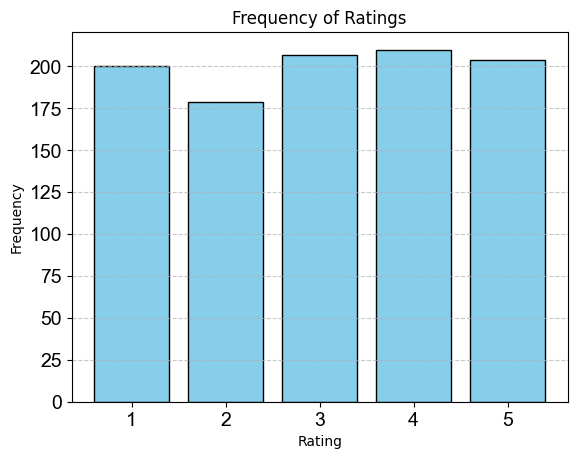

In [87]:
import matplotlib.pyplot as plt

# Create the bar chart using Matplotlib
plt.bar(rating_counts.index, rating_counts.values)

# Customize the chart layout and style
plt.title('Frequency of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('white')  # Set the background color

# Customize the font
plt.xticks(fontsize=14, family='Arial')
plt.yticks(fontsize=14, family='Arial')

# Set bar properties
plt.bar(rating_counts.index, rating_counts.values, color='skyblue', edgecolor='black')

# Display the chart
plt.show()


In [88]:
product_ranking =big_detergent_df.groupby(['ProductId'])['Rating'].mean().reset_index().sort_values(by = 'Rating', ascending=False)
product_ranking.head()

,ProductId,Rating
41,41,3.705882
38,38,3.684211
11,11,3.631579
47,47,3.578947
49,49,3.423077


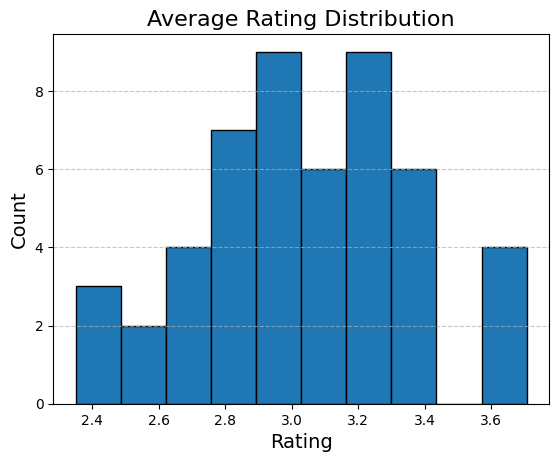

In [89]:
import matplotlib.pyplot as plt

# Create the distribution chart (histogram) using Matplotlib
plt.hist(product_ranking['Rating'], bins=10, edgecolor='black')

# Customize the layout and style
plt.title('Average Rating Distribution', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.show()


In [ ]:

products_ratings = .pivot_table(index='ProductId', columns='Rating', values='Timestamp', aggfunc='count', fill_value=0)
products_ratings.columns = ['Rating ' + str(col) for col in products_ratings.columns]
products_ratings['Frequency'] = products_ratings.sum(axis=1)
# products_ratings = products_ratings.sort_values('Frequency', ascending=False)

In [91]:
products_ratings.head()

,Rating 1,Rating 2,Rating 3,Rating 4,Rating 5,Frequency
ProductId,,,,,,
0,5,4,4,6,0,19
1,5,1,3,3,2,14
2,2,3,2,5,0,12
3,5,6,6,10,3,30
4,4,3,6,2,5,20


In [95]:
# Pivot the table to get ratings as columns and count frequency
users_ratings = big_detergent_df.pivot_table(index='UserId', columns='Rating', aggfunc='size', fill_value=0)

# Add the 'Frequency' column (sum across ratings)
users_ratings['Frequency'] = users_ratings.sum(axis=1)


In [97]:
#  Rename the columns for clarity
users_ratings.columns = ['Rating ' + str(col) for col in users_ratings.columns]


In [98]:

# Reset the index to make 'UserId' a regular column
users_ratings = users_ratings.reset_index()


In [102]:

# Sort by 'Frequency' in descending order
users_ratings = users_ratings.sort_values(by='Rating Rating Frequency', ascending=False)

# Set the 'UserId' column as the index
users_ratings.set_index('Rating UserId', inplace=True)

users_ratings.head(10)

,index,Rating Rating 1,Rating Rating 2,Rating Rating 3,Rating Rating 4,Rating Rating 5,Rating Rating Frequency
Rating UserId,,,,,,,
550,550,1,1,1,2,0,5
631,631,0,1,2,0,2,5
218,218,0,0,1,2,1,4
605,605,0,0,1,1,2,4
489,489,1,0,1,1,1,4
481,481,0,1,0,2,1,4
119,119,0,1,1,0,2,4
428,428,2,0,0,2,0,4
590,590,1,1,0,1,1,4


In [100]:
print(users_ratings.columns)


Index(['index', 'Rating UserId', 'Rating Rating 1', 'Rating Rating 2',
       'Rating Rating 3', 'Rating Rating 4', 'Rating Rating 5',
       'Rating Rating Frequency'],
      dtype='object')
